MOBILE PRICE PREDICTOR

In [37]:
import pandas as pd
import numpy as np

In [38]:
df = pd.read_csv('mobile dataset.csv')



In [43]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2000, 21)


In [44]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_scre

In [45]:
print("\nMissing Values:\n", df.isnull().sum())





Missing Values:
 battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [46]:
print("\nData Types:\n", df.dtypes)


Data Types:
 battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [47]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837

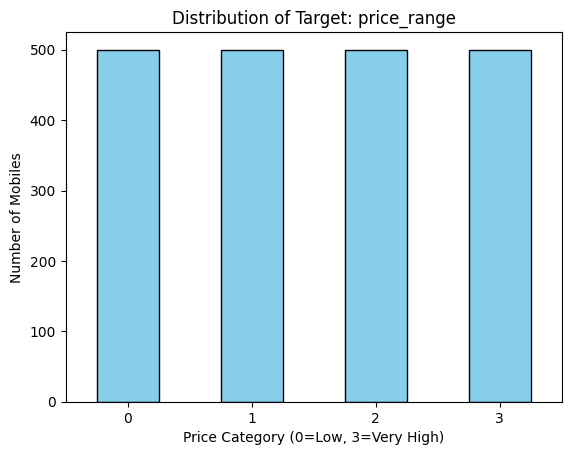

In [48]:
price_counts = df['price_range'].value_counts().sort_index()
price_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Target: price_range')
plt.xlabel('Price Category (0=Low, 3=Very High)')
plt.ylabel('Number of Mobiles')
plt.xticks(rotation=0)
plt.show()

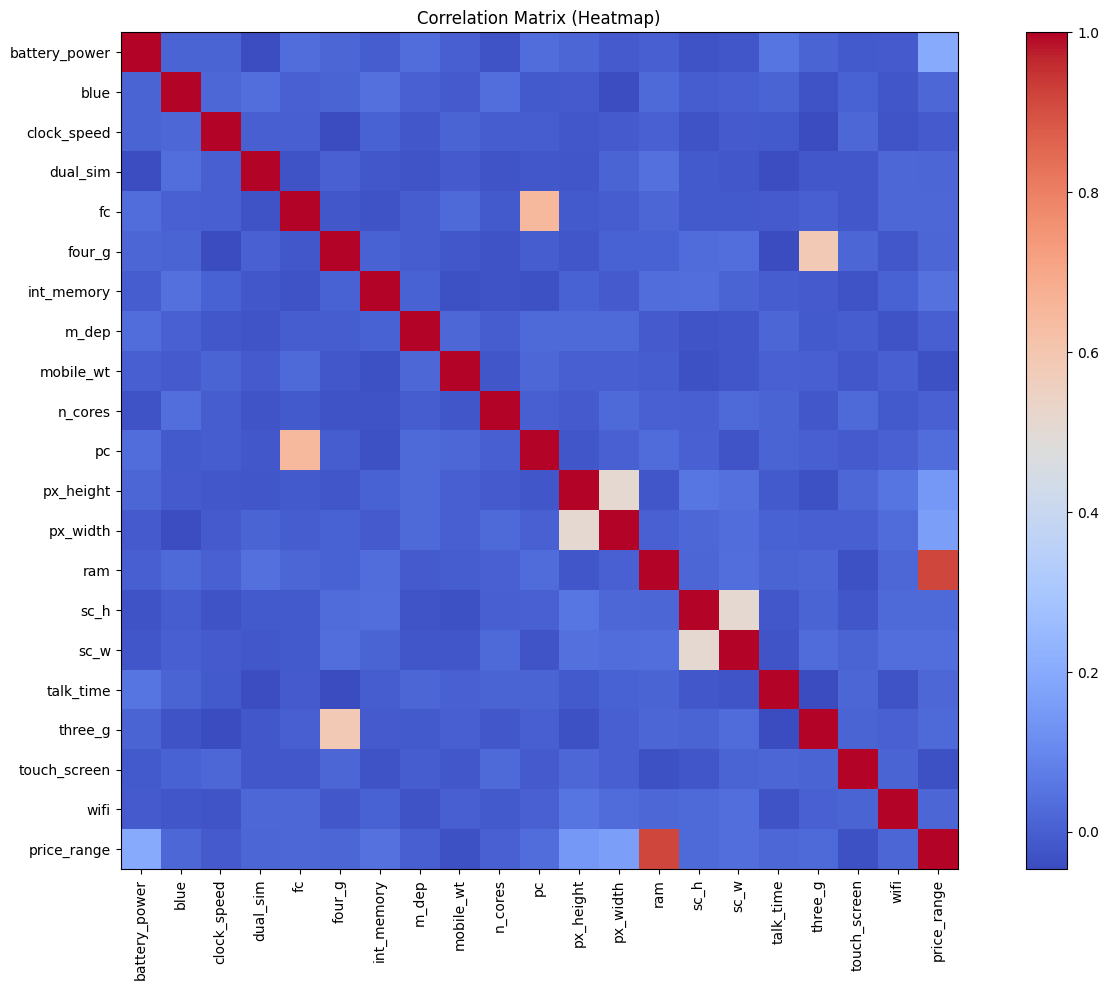

In [49]:
import numpy as np

correlation_matrix = df.corr()

plt.figure(figsize=(14, 10))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix (Heatmap)')
plt.tight_layout()
plt.show()

In [50]:
X = df.drop('price_range', axis=1)
y = df['price_range']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("Target value counts:\n", y.value_counts())

Features shape: (2000, 20)
Target shape: (2000,)
Target value counts:
 price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64


In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training set class distribution:\n", y_train.value_counts())
print("Test set class distribution:\n", y_test.value_counts())


Training set shape: (1600, 20)
Test set shape: (400, 20)
Training set class distribution:
 price_range
1    400
0    400
3    400
2    400
Name: count, dtype: int64
Test set class distribution:
 price_range
3    100
1    100
0    100
2    100
Name: count, dtype: int64


In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaled training set shape:", X_train_scaled.shape)
print("Scaled test set shape:", X_test_scaled.shape)


Scaled training set shape: (1600, 20)
Scaled test set shape: (400, 20)


In [53]:
correlations = df.corr()['price_range'].drop('price_range').sort_values(ascending=False)
print("\nFeature correlations with target:\n", correlations)


Feature correlations with target:
 ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64


In [55]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression( max_iter=2000, random_state=42)
lr_model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=2000, random_state=42)

In [59]:
from sklearn.metrics import classification_report

y_pred_lr = lr_model.predict(X_test_scaled)

report = classification_report(y_test, y_pred_lr)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



In [60]:
import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.where(approx >= 0, 1, 0)  # Output 0 or 1


In [62]:
binary_mask = (y_train <= 1)
X_bin = X_train_scaled[binary_mask]
y_bin = y_train[binary_mask]

In [63]:
svm = LinearSVM(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm.fit(X_bin, y_bin)

In [64]:
binary_mask_test = (y_test <= 1)
X_test_bin = X_test_scaled[binary_mask_test]
y_test_bin = y_test[binary_mask_test]

y_pred = svm.predict(X_test_bin)

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_test_bin, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.50      1.00      0.67       100
           1       0.00      0.00      0.00       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200



In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       100
           1       0.82      0.84      0.83       100
           2       0.81      0.79      0.80       100
           3       0.93      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [68]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [69]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_dt = dt_model.predict(X_test)

print("===== Decision Tree Classification Report =====")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


===== Decision Tree Classification Report =====
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       100
           1       0.78      0.74      0.76       100
           2       0.75      0.80      0.77       100
           3       0.92      0.86      0.89       100

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.83      0.83      0.83       400

Confusion Matrix:
[[92  8  0  0]
 [13 74 13  0]
 [ 0 13 80  7]
 [ 0  0 14 86]]


In [70]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [84]:
y_pred_knn = knn_model.predict(X_test_scaled)

print(y_pred_knn)
print("\n")

[3 2 0 1 2 2 1 1 0 1 2 0 1 1 2 3 2 0 3 2 2 0 3 1 2 1 1 0 1 0 1 2 0 2 1 3 1
 2 0 0 0 0 1 2 3 0 2 2 2 2 0 2 0 2 1 1 2 0 3 3 1 1 3 0 0 0 1 1 1 3 3 1 0 1
 2 1 2 2 0 1 3 1 2 0 0 0 0 1 0 0 0 1 3 2 0 1 2 0 3 1 1 0 2 0 3 3 0 2 1 1 0
 1 3 3 3 2 1 3 1 1 1 0 3 1 2 3 2 0 3 3 2 0 0 2 1 0 1 3 0 3 3 3 1 0 3 2 2 1
 0 2 3 0 1 0 3 3 1 2 0 1 1 0 0 3 3 1 3 1 2 0 0 2 1 2 1 1 0 3 0 2 0 1 3 3 0
 1 0 1 0 0 1 3 1 2 2 0 1 1 0 1 2 1 3 2 0 0 2 0 0 3 1 3 2 0 0 2 2 1 3 2 0 3
 0 1 1 1 1 2 2 0 0 1 0 0 0 1 1 2 1 3 2 2 0 0 3 2 1 3 3 2 2 1 3 3 1 2 2 2 2
 1 2 1 2 1 1 0 1 0 2 3 1 0 0 0 2 3 2 2 3 1 3 2 2 1 0 0 1 0 1 3 0 0 3 2 0 2
 1 1 1 2 1 3 1 2 2 3 1 2 1 1 0 0 1 3 2 3 3 2 0 2 2 1 2 3 0 2 3 1 0 1 2 2 0
 0 1 0 1 1 2 0 2 1 2 1 2 0 3 1 2 2 3 1 3 1 1 0 0 0 2 3 3 0 2 1 3 1 2 2 3 0
 0 0 0 2 1 0 0 1 2 2 2 2 1 2 1 2 0 2 3 2 0 1 1 2 0 2 1 1 1 0]




In [85]:
from sklearn.metrics import classification_report, confusion_matrix

print("===== KNN Classification Report =====")
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


===== KNN Classification Report =====
              precision    recall  f1-score   support

           0       0.65      0.70      0.67       100
           1       0.33      0.38      0.35       100
           2       0.39      0.41      0.40       100
           3       0.72      0.51      0.60       100

    accuracy                           0.50       400
   macro avg       0.52      0.50      0.51       400
weighted avg       0.52      0.50      0.51       400

Confusion Matrix:
[[70 26  4  0]
 [33 38 24  5]
 [ 5 39 41 15]
 [ 0 13 36 51]]


In [86]:
class SoftmaxRegression:
    def __init__(self, lr=0.1, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.W = None
        self.b = None

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))  # Stability
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples, n_features = X.shape
        n_classes = np.max(y) + 1

        Y_onehot = np.zeros((n_samples, n_classes))
        Y_onehot[np.arange(n_samples), y] = 1

        self.W = np.zeros((n_features, n_classes))
        self.b = np.zeros((1, n_classes))

        for i in range(self.n_iter):
            logits = np.dot(X, self.W) + self.b
            probs = self._softmax(logits)
            
            dW = (1/n_samples) * np.dot(X.T, (probs - Y_onehot))
            db = (1/n_samples) * np.sum(probs - Y_onehot, axis=0, keepdims=True)

            self.W -= self.lr * dW
            self.b -= self.lr * db

    def predict(self, X):
        logits = np.dot(X, self.W) + self.b
        probs = self._softmax(logits)
        return np.argmax(probs, axis=1)

    def predict_proba(self, X):
        logits = np.dot(X, self.W) + self.b
        return self._softmax(logits)


In [87]:

X_train_np = np.array(X_train_scaled)
X_test_np = np.array(X_test_scaled)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)


In [88]:
model = SoftmaxRegression(lr=0.1, n_iter=1000)
model.fit(X_train_np, y_train_np)

y_pred = model.predict(X_test_np)
print(y_pred)

[3 1 0 2 3 2 0 0 1 0 3 0 0 1 3 3 2 0 1 3 1 0 3 2 2 1 1 0 2 1 1 2 0 2 2 3 0
 3 1 0 2 0 0 2 3 0 3 3 2 1 0 3 0 2 0 3 3 0 3 1 1 2 3 1 0 1 0 1 3 3 3 2 0 1
 2 0 3 3 1 3 3 2 2 0 0 1 0 0 0 0 0 2 2 3 0 3 0 0 2 2 3 1 1 0 3 3 1 2 1 1 0
 2 3 2 3 2 2 2 2 2 2 0 3 0 3 3 2 0 2 3 3 1 0 1 3 1 2 3 2 3 3 3 2 1 3 2 1 1
 0 0 3 0 1 1 3 3 3 3 0 2 1 1 0 3 1 1 3 1 3 0 1 1 1 3 2 1 1 3 0 3 2 2 2 3 0
 2 0 1 1 1 0 2 1 2 3 0 2 3 1 1 1 3 1 2 0 0 3 1 1 2 1 3 1 0 0 3 1 2 3 3 0 3
 3 1 2 1 1 2 1 1 0 2 0 0 0 0 0 2 2 3 2 3 0 1 3 2 2 3 3 2 1 0 3 3 1 3 2 1 2
 2 2 2 2 1 0 0 3 1 2 3 3 0 0 0 1 3 2 2 3 1 3 2 2 1 1 0 1 1 2 3 1 0 3 1 1 1
 0 1 1 2 1 3 0 3 2 3 1 3 1 1 0 0 2 3 3 2 3 1 0 2 0 2 3 3 0 0 3 2 0 1 1 0 0
 0 0 0 3 1 3 0 1 2 3 2 3 0 2 1 2 3 3 0 2 3 1 0 0 1 2 3 3 0 1 0 3 3 3 1 2 1
 1 0 0 3 1 0 0 0 3 1 1 2 0 3 0 3 2 3 3 2 0 1 1 1 0 1 2 0 2 2]


In [89]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test_np, y_pred))
print("\n")
print(classification_report(y_test_np, y_pred))

Accuracy: 0.9225


              precision    recall  f1-score   support

           0       0.96      0.97      0.97       100
           1       0.89      0.90      0.90       100
           2       0.92      0.83      0.87       100
           3       0.92      0.99      0.95       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [96]:
import numpy as np

class SimpleNeuralNetwork:
    def __init__(self, input_dim, hidden_dim, output_dim, lr=0.01, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.W1 = np.random.randn(input_dim, hidden_dim) * 0.01
        self.b1 = np.zeros((1, hidden_dim))
        self.W2 = np.random.randn(hidden_dim, output_dim) * 0.01
        self.b2 = np.zeros((1, output_dim))

    def _relu(self, z):
        return np.maximum(0, z)

    def _relu_deriv(self, z):
        return (z > 0).astype(float)

    def _softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def fit(self, X, y):
        n_samples = X.shape[0]
        n_classes = np.max(y) + 1
        Y_onehot = np.zeros((n_samples, n_classes))
        Y_onehot[np.arange(n_samples), y] = 1

        for i in range(self.n_iter):
            Z1 = np.dot(X, self.W1) + self.b1
            A1 = self._relu(Z1)
            Z2 = np.dot(A1, self.W2) + self.b2
            A2 = self._softmax(Z2)

            dZ2 = (A2 - Y_onehot) / n_samples
            dW2 = np.dot(A1.T, dZ2)
            db2 = np.sum(dZ2, axis=0, keepdims=True)

            dA1 = np.dot(dZ2, self.W2.T)
            dZ1 = dA1 * self._relu_deriv(Z1)
            dW1 = np.dot(X.T, dZ1)
            db1 = np.sum(dZ1, axis=0, keepdims=True)

            self.W1 -= self.lr * dW1
            self.b1 -= self.lr * db1
            self.W2 -= self.lr * dW2
            self.b2 -= self.lr * db2

    def predict(self, X):
        Z1 = np.dot(X, self.W1) + self.b1
        A1 = self._relu(Z1)
        Z2 = np.dot(A1, self.W2) + self.b2
        A2 = self._softmax(Z2)
        return np.argmax(A2, axis=1)


In [97]:
nn = SimpleNeuralNetwork(input_dim=X_train_np.shape[1], hidden_dim=32, output_dim=4, lr=0.01, n_iter=1000)
nn.fit(X_train_np, y_train_np)
y_pred = nn.predict(X_test_np)

In [98]:
print(y_pred)

[3 0 0 3 3 3 0 0 0 0 3 0 0 0 3 3 3 0 0 3 0 0 3 3 3 0 3 0 3 0 0 3 0 3 3 3 0
 3 0 0 3 0 0 3 3 0 3 3 3 0 0 3 0 3 0 3 3 0 3 0 0 3 3 0 0 0 0 0 3 3 3 3 0 0
 3 0 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 3 3 3 0 3 0 0 3 3 3 0 0 0 3 3 3 3 0 0 0
 3 3 0 3 3 3 3 3 3 3 0 3 0 3 3 3 0 3 3 3 0 0 0 3 0 0 3 0 3 3 3 3 0 3 3 0 0
 0 0 3 0 0 0 3 3 3 3 0 3 3 0 0 3 0 0 3 0 3 0 0 0 0 3 3 0 0 3 0 3 3 3 3 3 0
 3 0 0 0 0 0 3 0 3 3 0 3 3 0 0 0 3 0 3 0 0 3 0 0 0 0 3 3 0 0 3 0 3 3 3 0 3
 3 3 3 0 3 3 0 0 0 3 0 0 0 0 0 3 3 3 3 3 0 0 3 3 3 3 3 3 0 0 3 3 0 3 3 3 3
 3 3 3 3 0 0 0 3 0 3 3 3 0 0 0 0 3 3 3 3 0 3 3 3 3 0 0 0 0 0 3 0 0 3 0 0 0
 0 0 0 0 0 3 0 3 3 3 0 3 0 3 0 0 3 3 3 3 3 0 0 3 0 3 3 3 0 0 3 3 0 0 0 0 0
 0 0 0 3 0 3 0 3 3 3 3 3 0 3 0 3 3 3 0 3 3 0 0 0 0 3 3 3 0 0 0 3 3 3 0 3 0
 0 0 0 3 0 0 0 0 3 0 0 3 0 3 0 3 0 3 3 3 0 0 0 0 0 0 3 0 3 3]


In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = nn.predict(X_test_np)

# Accuracy
acc = accuracy_score(y_test_np, y_pred)
print(f"Accuracy: {acc:.4f}")

# Classification report (precision, recall, f1-score for each class)
print("Classification Report:")
print(classification_report(y_test_np, y_pred, zero_division=0))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test_np, y_pred))


Accuracy: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.50      1.00      0.66       100

    accuracy                           0.50       400
   macro avg       0.25      0.50      0.33       400
weighted avg       0.25      0.50      0.33       400

Confusion Matrix:
[[100   0   0   0]
 [ 94   0   0   6]
 [  4   0   0  96]
 [  0   0   0 100]]
